# Computer Vision - P4


## Delivery

Your overall grading will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented exhaustively and in *English*.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Answers to questions also need to be in *English*.

- Make sure to print and plot exactly what it is indicated. If a reference image is provided, your output is expected to be exactly the same unless instructed differently.

- The deliverable of both parts must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook (upload the ones that were not provided)
    
- It is required that your code can be run by us without need of any modification and without getting any errors.

- Use packages and solutions that were covered in your class and tutorials. If you are unsure about using a particular package, you should seek clarification from your instructor to confirm whether it is allowed.

- Please refrain from utilizing resources like ChatGPT to complete this lab assignment.


**Deadline (Campus Virtual): November 28th, 23:00 h**

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

The main topics of Laboratory 4 are:

    4.1) SSD and Normalized Cross-correlation for template matching

    4.2) HOG image descriptor for object (person) detection

    4.3) Recognition by correspondance, based on feature extraction (ORB)

In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

In [1]:
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
from skimage.feature import match_template
from skimage.color import rgb2gray,rgba2rgb
from skimage.transform import rotate
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import img_as_float
from skimage.transform import resize

%matplotlib inline

Matplotlib created a temporary config/cache directory at /var/folders/lz/zmsq9h_175198zgg4k68k8th0000gn/T/matplotlib-ot8pjef0 because the default path (/Users/pedro/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## 1 Template matching

**1.1 (10 points)** Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- SSD distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

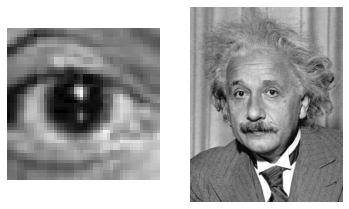

In [2]:
# Your solution here
plt.subplot(1,2,1)
eye = io.imread('./images/eye.png')
plt.imshow(eye)
plt.axis('off')

plt.subplot(1,2,2)
einstein = io.imread('./images/einstein.png')
plt.imshow(einstein)
plt.axis('off')

plt.show()

Create a **function** for template matching applying SSD distance and normalized cross-correlation and display the results in the following format:

<img src="images/tm.png" width="800" height="400">

**Use titles in all figures to understand what is being displayed.**

Note: the decision of threshold for SSD distance and normalized cross-correlation will affect your results, try values that get you as close to the shown result as possible but we understand you might not get exactly the same outcome.

In [3]:
# Your solution here
def euclid(img,img2):
    #SSD
    x = img.shape[0]-img2.shape[0]
    y = img.shape[1]-img2.shape[1]
    matrix = np.ones([x,y])
    
    for i in range(x):
        for j in range(y):            
            matrix[i][j] = np.linalg.norm(img[i: img2.shape[0]+i, j: img2.shape[1] + j ] - img2) #Norm of the difference
    return matrix #Result

#Cross Correlation
einstein_gray = rgb2gray(rgba2rgb(einstein)) #to gray an RGB 
eye_gray = rgb2gray(rgba2rgb(eye))
crossCorrelation = match_template(einstein_gray,eye_gray) #incorporates normalized cross-correlation
crossCorrelationThreshold = crossCorrelation > 0.55 #cross-correlation normalized with threshold
EuclideanDistance = euclid(einstein_gray,eye_gray) #Euclidean distance
EuclideanDistanceThreshold = EuclideanDistance < 8.57 #Euclidean distance threshold

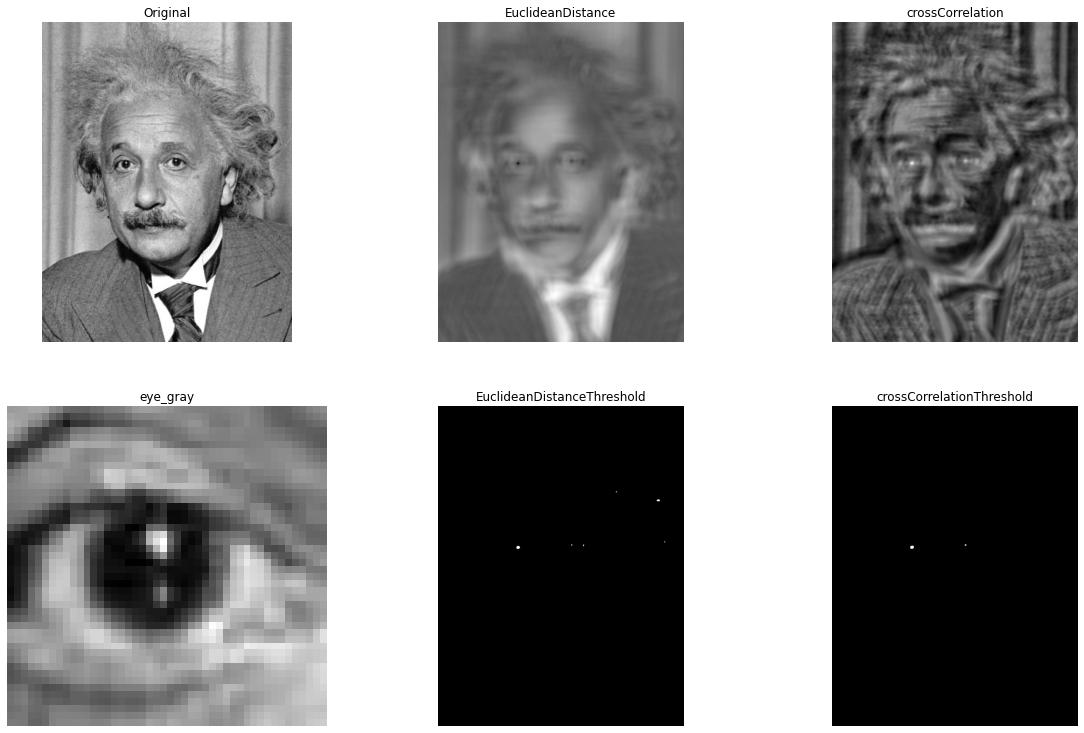

In [4]:
fig = plt.figure(figsize=(20,20))

plt.subplot(3, 3,1)
plt.imshow(einstein_gray, 'gray')     #We display the photo
plt.title("Original")   #We display the title.
plt.axis(False)

plt.subplot(3, 3,2)
plt.imshow(EuclideanDistance, cmap='gray')   #We display the photo
plt.title("EuclideanDistance")   #We display the title.
plt.axis(False)

plt.subplot(3, 3,3)
plt.imshow(crossCorrelation, cmap='gray')     #We display the photo
plt.title("crossCorrelation")   #We display the title.
plt.axis(False)

plt.subplot(3, 3,4)
plt.imshow(eye_gray, cmap='gray')      #We display the photo
plt.title("eye_gray")   #We display the title.
plt.axis(False)

plt.subplot(3, 3,5)
plt.imshow(EuclideanDistanceThreshold, cmap='gray')      #We display the photo
plt.title("EuclideanDistanceThreshold")   #We display the title.
plt.axis(False)

plt.subplot(3, 3,6)
plt.imshow(crossCorrelationThreshold, cmap='gray')      #We display the photo
plt.title("crossCorrelationThreshold")   #We display the title.
plt.axis(False)

plt.show()

**1.2 (5 points)** How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)?

Similarly to the previous case, please, visualize the euclidean distance and normalized cross-correlation images as well as the binarized (thresholded) images in the two cases.

**Note:** Use titles of the figures to explain what is displayed.


Read `einstein_br.png` and display the results of the template matching techniques used on 1.1 on this image, using `eye.png` as template:

In [5]:
# Your solution here
einstein_br = io.imread('./images/einstein_br.png') #Load image
einstein_br = einstein_br / einstein_br.max() #normalize the image (0-1)
crossCorrelationEinstein = match_template(einstein_br,eye_gray) #incorporates normalized cross-correlation
crossCorrelationEinsteinThreshold = crossCorrelationEinstein > 0.55 #cross-correlation normalized with threshold
euclideanDistanceEinstein = euclid(einstein_br,eye_gray) #Euclidean distance
euclideanDistanceEinsteinThreshold = euclideanDistanceEinstein < 8.57 #Euclidean distance threshold

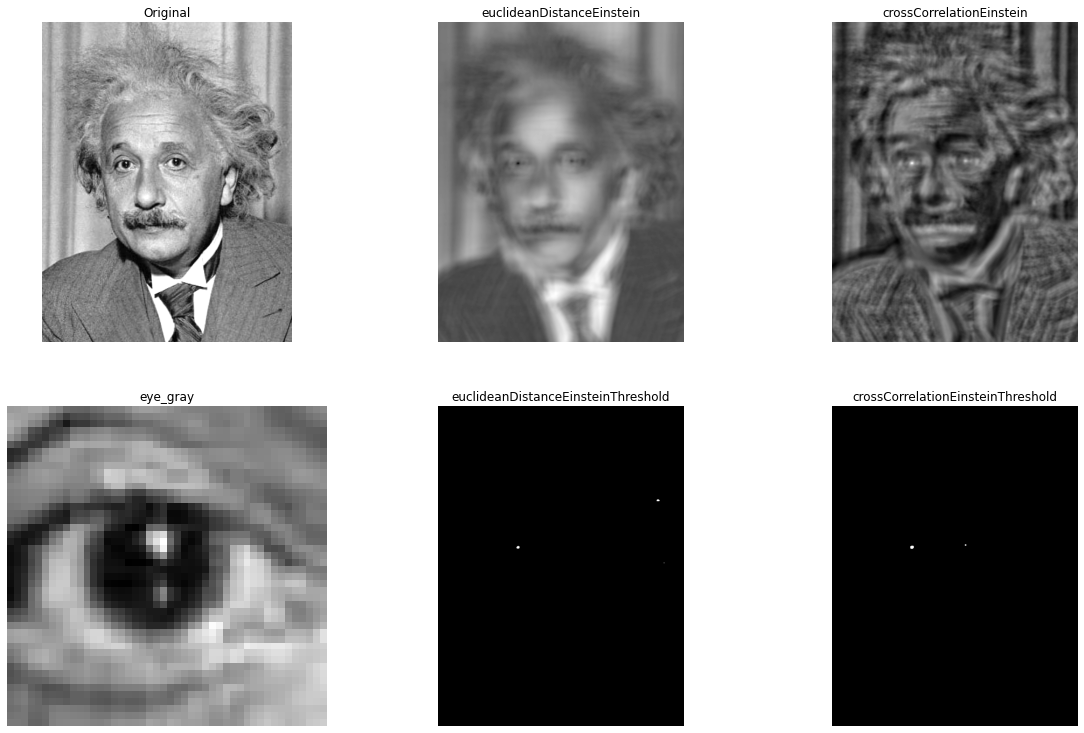

In [6]:
#Visualize images
fig = plt.figure(figsize=(20,20))

plt.subplot(3, 3,1)
plt.imshow(einstein_br,'gray')     #We display the photo
plt.title("Original")   #We display the title
plt.axis(False)

plt.subplot(3, 3,2)
plt.imshow(euclideanDistanceEinstein,cmap='gray')   #We display the photo
plt.title("euclideanDistanceEinstein")   #We display the title
plt.axis(False)

plt.subplot(3, 3,3)
plt.imshow(crossCorrelationEinstein,cmap='gray')     #We display the photo
plt.title("crossCorrelationEinstein")   #We display the title
plt.axis(False)

plt.subplot(3, 3,4)
plt.imshow(eye_gray,cmap='gray')      #We display the photo
plt.title("eye_gray")   #We display the title
plt.axis(False)

plt.subplot(3, 3,5)
plt.imshow(euclideanDistanceEinsteinThreshold,cmap='gray')      #We display the photo
plt.title("euclideanDistanceEinsteinThreshold")   #We display the title
plt.axis(False)

plt.subplot(3, 3,6)
plt.imshow(crossCorrelationEinsteinThreshold,cmap='gray')      #We display the photo
plt.title("crossCorrelationEinsteinThreshold")   #We display the title
plt.axis(False)

plt.show()

Print the minimum SSD and the maximum Normalized Cross-Correlation (NCC)

In [7]:
# Your solution here
print("Max NCC: ",crossCorrelationEinstein.max()) # Max value
print("Min SSD: ",euclideanDistanceEinstein.min()) # Min value

Max NCC:  0.9768232838639557
Min SSD:  3.069853196384541


**1.3 (5 points)** Read `einstein_mask.png` and display the results on this image using your previously coded function, using the `eye.png` template:

In [8]:
# Your solution here
mask = io.imread("images/einstein_mask.png") # Load image
mask = mask / mask.max() # normalize the image (0-1)
crossCorrelationMask = match_template(mask,eye_gray) #Uses normalized cross-correlation
crossCorrelationMaskThreshold = crossCorrelationMask > 0.55 #normalized cross-correlation with threshold
euclideanDistanceMask = euclid(mask,eye_gray)  #Euclidean distance
euclideanDistanceMaskThreshold = euclideanDistanceMask < 8.57 #Euclidean distance threshold

Print the minimum SSD and the maximum NCC

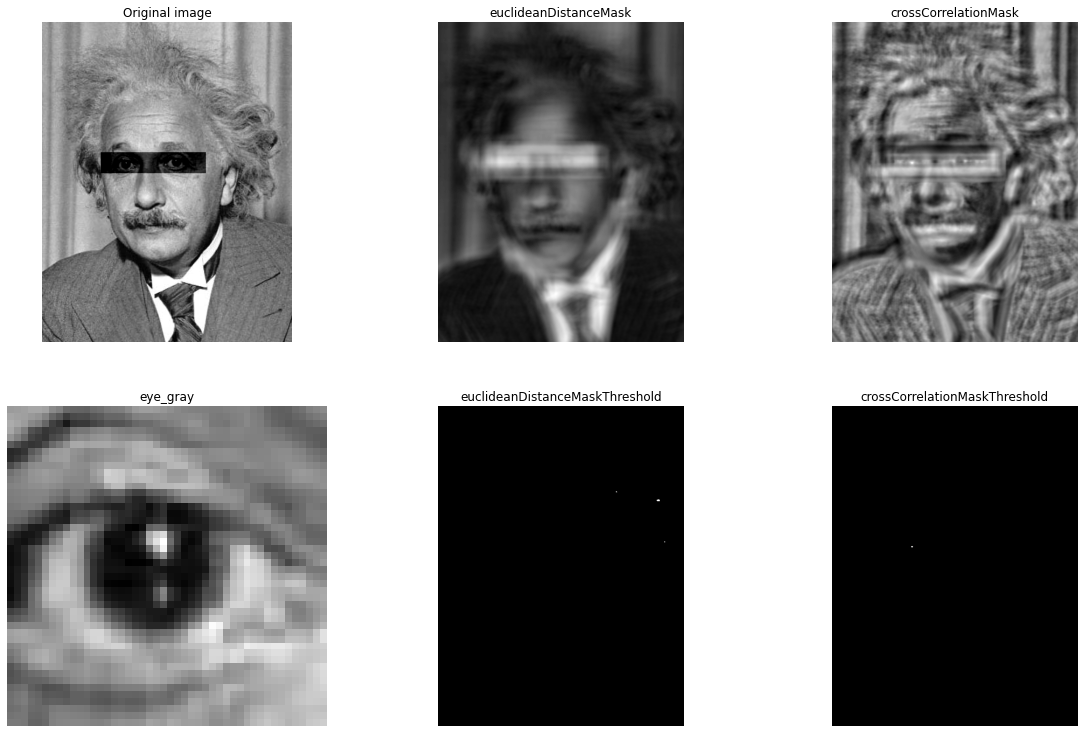

In [9]:
#Visualize images
fig = plt.figure(figsize=(20,20))
plt.subplot(3, 3,1)
plt.imshow(mask,'gray')     #We display the photo
plt.title("Original image")   #We display the title
plt.axis(False)

plt.subplot(3, 3,2)
plt.imshow(euclideanDistanceMask,cmap='gray')   #We display the photo
plt.title("euclideanDistanceMask")   #We display the title
plt.axis(False)

plt.subplot(3, 3,3)
plt.imshow(crossCorrelationMask,cmap='gray')     #We display the photo
plt.title("crossCorrelationMask")   #We display the title
plt.axis(False)

plt.subplot(3, 3,4)
plt.imshow(eye_gray,cmap='gray')      #We display the photo
plt.title("eye_gray")   #We display the title
plt.axis(False)

plt.subplot(3, 3,5)
plt.imshow(euclideanDistanceMaskThreshold,cmap='gray')      #We display the photo
plt.title("euclideanDistanceMaskThreshold")   #We display the title
plt.axis(False)

plt.subplot(3, 3,6)
plt.imshow(crossCorrelationMaskThreshold,cmap='gray')      #We display the photo
plt.title("crossCorrelationMaskThreshold")   #We display the title
plt.axis(False)

plt.show()

What are the distances between the template and the image around the eyes of the image?

Comment the template matching process:
* Is the algorithms affected by contrast changes in the image?
* How do metrics (i.e. minimum euclidean distance and maximum NCC) change in all previous cases? Is there a big difference among these values?
* What parameters it has and which measure for image comparisons works better.

In [10]:
# Your solution here

**1.4 (5 points)** How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the `eye_br.png` template.

In [11]:
# Your solution here
eye_br = io.imread("images/eye_br.png") # Load template
eye_br = eye_br / eye_br.max() # normalize the image (0-1)
crossCorrelationEye = match_template(einstein_gray, eye_br) #Uses normalized cross-correlation
crossCorrelationEyeThreshold = crossCorrelationEye > 0.55 #normalized cross-correlation with threshold
euclideanDistanceEye = euclid(einstein_gray, eye_br) #Euclidean distance
euclideanDistanceEyeThreshold = euclideanDistanceEye < 8.57  #Euclidean distance threshold

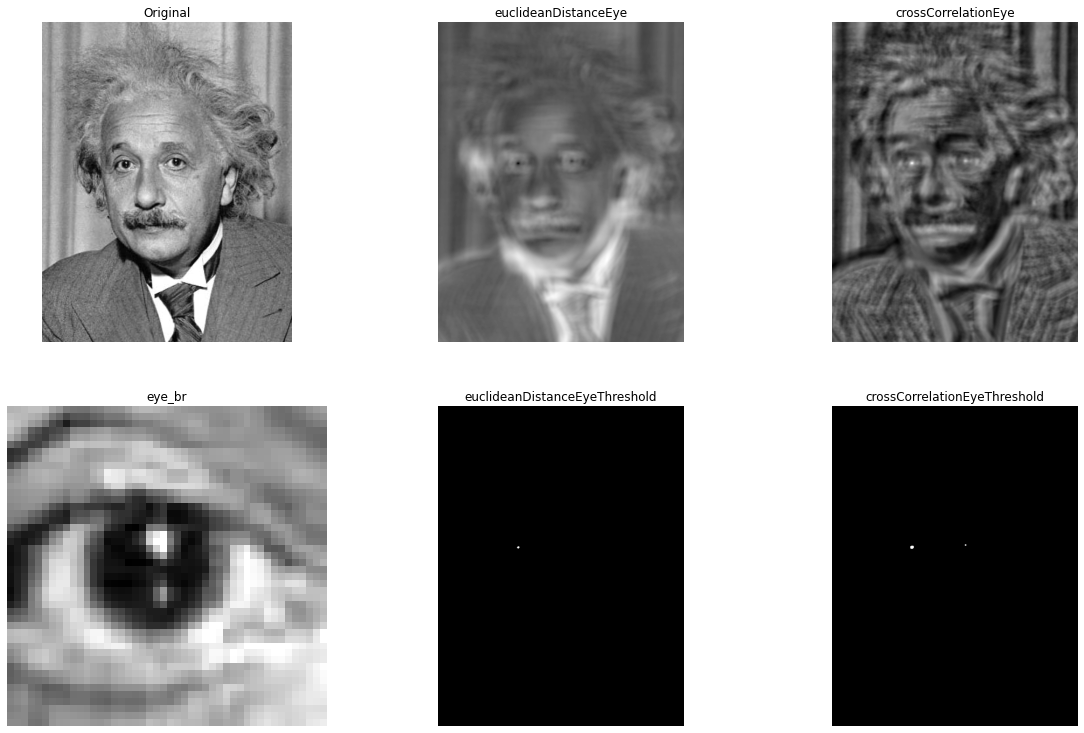

In [12]:
#Visualize images
fig = plt.figure(figsize=(20,20))

plt.subplot(3, 3,1)
plt.imshow(einstein_gray,'gray')     #We display the photo
plt.title("Original")   #We display the title
plt.axis(False)

plt.subplot(3, 3,2)
plt.imshow(euclideanDistanceEye,cmap='gray')   #We display the photo
plt.title("euclideanDistanceEye")   #We display the title
plt.axis(False)

plt.subplot(3, 3,3)
plt.imshow(crossCorrelationEye,cmap='gray')     #We display the photo
plt.title("crossCorrelationEye")   #We display the title
plt.axis(False)

plt.subplot(3, 3,4)
plt.imshow(eye_br,cmap='gray')      #We display the photo
plt.title("eye_br")   #We display the title
plt.axis(False)

plt.subplot(3, 3,5)
plt.imshow(euclideanDistanceEyeThreshold,cmap='gray')      #We display the photo
plt.title("euclideanDistanceEyeThreshold")   #We display the title
plt.axis(False)

plt.subplot(3, 3,6)
plt.imshow(crossCorrelationEyeThreshold,cmap='gray')      #We display the photo
plt.title("crossCorrelationEyeThreshold")   #We display the title
plt.axis(False)

plt.show()

Check how the result changes if the template is rotated.

Visualize the template and its rotation by 2º, 5º, 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation. Pick fixed values of thresholds that are well suited for the non rotated image.  

**Help:** use the function rotate() in skimage.transform

In [13]:
# Your solution here

#Visual listmaking
rotation = []
crossCorrelations = []
euclideanDistance = []
crossCorrelationsThreshold = []
euclideanDistanceThreshold =[]

# Rotation model
rotation.append(rotate(eye_gray, 2))
rotation.append(rotate(eye_gray, 5))
rotation.append(rotate(eye_gray, 10))
rotation.append(rotate(eye_gray, 15))
rotation.append(rotate(eye_gray, 20))

#Euclidean distance and normalized cross-correlation using rotated templates
crossCorrelationsR2 = match_template(einstein_gray, rotation[0])
crossCorrelations.append(crossCorrelationsR2)
crossCorrelationsThreshold.append(crossCorrelationsR2 > 0.55)
euclideanDistanceR2 = euclid(einstein_gray, rotation[0])
euclideanDistance.append(euclideanDistanceR2)
euclideanDistanceThreshold.append(euclideanDistanceR2 < 8.57)

crossCorrelationsR5 = match_template(einstein_gray,rotation[1])
crossCorrelations.append(crossCorrelationsR5)
crossCorrelationsThreshold.append(crossCorrelationsR5 > 0.55)
euclideanDistanceR5 = euclid(einstein_gray, rotation[1])
euclideanDistance.append(euclideanDistanceR5)
euclideanDistanceThreshold.append(euclideanDistanceR5 < 8.57)


crossCorrelationsR10 = match_template(einstein_gray, rotation[2])
crossCorrelations.append(crossCorrelationsR10)
crossCorrelationsThreshold.append(crossCorrelationsR10 > 0.55)
euclideanDistanceR10 = euclid(einstein_gray, rotation[2])
euclideanDistance.append(euclideanDistanceR10)
euclideanDistanceThreshold.append(euclideanDistanceR10 < 8.57)


crossCorrelationsR15 = match_template(einstein_gray, rotation[3])
crossCorrelations.append(crossCorrelationsR15)
crossCorrelationsThreshold.append(crossCorrelationsR15 > 0.55)
euclideanDistanceR15 = euclid(einstein_gray, rotation[3])
euclideanDistance.append(euclideanDistanceR15)
euclideanDistanceThreshold.append(euclideanDistanceR15 < 8.57)

crossCorrelationsR20 = match_template(einstein_gray, rotation[4])
crossCorrelations.append(crossCorrelationsR20)
crossCorrelationsThreshold.append(crossCorrelationsR20 > 0.55)
euclideanDistanceR20 = euclid(einstein_gray,rotation[4])
euclideanDistance.append(euclideanDistanceR20)
euclideanDistanceThreshold.append(euclideanDistanceR20 < 8.57)

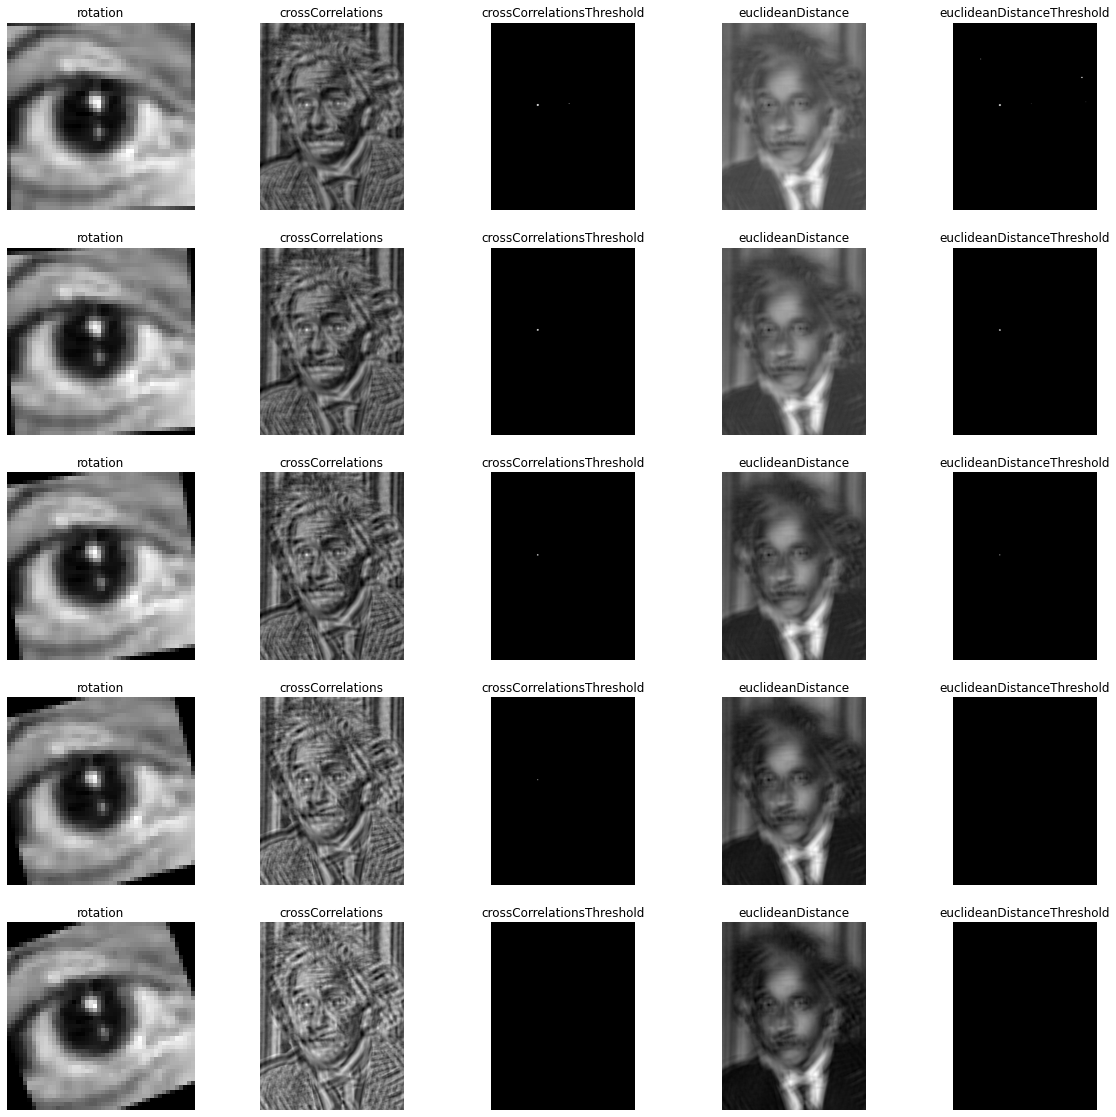

In [14]:
fig = plt.figure(figsize=(20,20))

for x in range(len(rotation)):
    plt.subplot(5, 5,1+x*5)
    plt.imshow(rotation[x],'gray')     #We display the photo
    plt.title("rotation")   #We display the title
    plt.axis(False)
    
    plt.subplot(5, 5,2+x*5)
    plt.imshow(crossCorrelations[x],'gray')     #We display the photo
    plt.title("crossCorrelations")   #We display the title
    plt.axis(False)

    plt.subplot(5, 5,3+x*5)
    plt.imshow(crossCorrelationsThreshold[x],'gray')     #We display the photo
    plt.title("crossCorrelationsThreshold")   #We display the title
    plt.axis(False)
    
    plt.subplot(5, 5,4+x*5)
    plt.imshow(euclideanDistance[x],'gray')     #We display the photo
    plt.title("euclideanDistance")   #We display the title
    plt.axis(False)
    
    plt.subplot(5, 5,5+x*5)
    plt.imshow(euclideanDistanceThreshold[x],'gray')     #We display the photo
    plt.title("euclideanDistanceThreshold")   #We display the title
    plt.axis(False)

Comment the template matching process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Is the algorithms affected by contrast changes in the tempate image?
* What parameters it has and which measure for image comparisons works better.

* Please, explain briefly the algorithm, including advantages and disadvantage

Template matching is a straightforward technique used in image processing to locate a predefined template within a larger image. The algorithm works by systematically comparing the template with different regions of the input image, aiming to identify areas where the template closely matches the content of the larger image.

### Advantages:

Simplicity: Template matching is easy to understand and implement.

Localization: It excels at precisely determining the position of the template within the larger image.

Applicability: Well-suited for scenarios where exact matches are sought, such as object recognition in controlled environments.


### Disadvantages:

Sensitivity: The algorithm is sensitive to variations in scale, rotation, and illumination, limiting its robustness in the presence of these changes.

Limited Robustness: Template matching may struggle with partial matches or instances where the template is occluded, and it can be influenced by noise in the images.

Computational Cost: For large images or templates, the algorithm's computational demands can be relatively high.



In summary, while template matching is advantageous for certain localization tasks due to its simplicity and precision, its sensitivity to specific image variations and limited robustness make it less suitable for more complex image processing challenges. Careful consideration of its strengths and weaknesses is essential when deciding its applicability for a given task.

* Is the algorithms affected by contrast changes in the tempate image?


Yes, template matching algorithms can be impacted by changes in the contrast of the template image. While normalization helps mitigate this impact, significant contrast variations can still affect the accuracy of the matching process.

* What parameters it has and which measure for image comparisons works better.


In template matching, parameters include thresholds (e.g., 0.55 and 8.57). For image comparisons, Euclidean distance measures dissimilarity (lower values are better matches), and normalized cross-correlation measures similarity (higher values are better matches). The choice between them depends on image characteristics, with normalized cross-correlation often more robust. Experimentation with thresholds is crucial for optimal results.

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to person detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image `person_template.bmp` and the folder `/images/TestPersonImages/`, apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

**2.1. (5 points)** Read the template (`person_template.bmp`), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

Obtain 2 versions of the HOG descriptor:
- With the default parameters.
- Then with 4x4 pixels per cell and 2x2 cells per block and orientations set to 8

Visualize the original image, the default values HOG descriptor and the defined parameters HOG descriptor in a 1x3 grid of images.

In [15]:
# Load the image
personTemplate = io.imread('images/person_template.bmp')

# Remove the alpha channel if it exists
if personTemplate.shape[-1] == 4:
    personTemplate = personTemplate[:, :, :3]

# Convert to grayscale
personTemplateGray = color.rgb2gray(personTemplate)

# Convert to float
personTemplateFloat = img_as_float(personTemplateGray)

# Obtain the person template's height and weight
heightPerson, weightPerson = personTemplate.shape[:2]

# Compute HOG descriptors with default parameters
fdDefault, hogDefault = hog(personTemplateFloat, visualize=True)

# Compute HOG descriptors with defined parameters
fdDefined, hogDefined = hog(personTemplateFloat, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)

# Visualize the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(personTemplateFloat, cmap='gray')
axes[0].set_title("Person Template")
axes[0].axis('off')

axes[1].imshow(hogDefault, cmap='gray')
axes[1].set_title("Default HOG Descriptor")
axes[1].axis('off')

axes[2].imshow(hogDefined, cmap='gray')
axes[2].set_title("Defined Parameters HOG Descriptor")
axes[2].axis('off')

plt.show()


NameError: name 'color' is not defined

Print and explain the number of feature resulting on the default parameters HOG descriptor (4536). Break this number down, starting from the original image size.

In [ ]:
# Your solution here


**2.2. (15 points)** Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template.

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images/hog.png" width="400" height="200">

In [ ]:
# Your solution here
def hogComparePersonTemplate(personTemplate, img):
    imgGray = rgb2gray(img)            #We convert to a graylevel image
    imgFloat = img_as_float(imgGray)       #We convert to type float
    
    #We obtain the HOG descriptor and HOG image of image
    fdImg, hogImg = hog(imgFloat, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    #We create the HOG result image of distance between the template and test image descriptor
    imgResult = np.ones((imgFloat.shape)) * np.inf    
    #Obtain height and weidht of current image
    heightPerson, weightPerson = personTemplate.shape
    heightImg, widthImg = img.shape[:2]

    # Iterate through the image
    for i in range(0, heightImg - heightPerson, 5):
        for j in range(0, widthImg - weightPerson, 5):
            # Get the region (slide window)
            region = imgFloat[i:i + heightPerson, j:j + weightPerson]

            # Check if the region has the same dimensions as the template
            if region.shape == personTemplate.shape:
                # Obtain the HOG descriptor and HOG image of the current region
                fdRegion, hogRegion = hog(region, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
                # Calculate the distance between the template and test image descriptor
                imgResult[i + round(heightPerson / 2), j + round(weightPerson / 2)] = np.linalg.norm(fdPerson - fdRegion)

    ij = np.unravel_index(np.argmin(imgResult), imgResult.shape)
    pos_x, pos_y = ij[::-1] 
    
    #Visualize it
    fig=plt.figure(figsize=(15,5))
    ax1=plt.subplot(1,3,1)
    ax2=plt.subplot(1,3,2)
    ax3=plt.subplot(1,3,3, sharex=ax2, sharey=ax2)
    ax1.axis(False)
    ax1.set_title('Person Template')         #We indicate the title
    ax1.imshow(personTemplate, cmap='gray')        #We show the image
    ax2.set_title('Best Region Match')       #We indicate the title
    ax2.axis(False)
    ax2.imshow(img, cmap='gray')           #We show the image
    ax3.set_title('HOG Distances')           #We indicate the title
    ax3.axis(False)
    ax3.imshow(hogImg, cmap='gray')    #We show the image
    rect2 = plt.Rectangle((pos_x - weightPerson / 2, pos_y - heightPerson / 2), weightPerson, heightPerson, edgecolor='r', facecolor='none')
    rect3 = plt.Rectangle((pos_x - weightPerson / 2, pos_y - heightPerson/  2), weightPerson, heightPerson, edgecolor='r', facecolor='none')
    ax2.add_patch(rect2)
    ax3.add_patch(rect3)
    plt.show()

In [ ]:
# Ensure that personTemplateFloat has the correct shape
personTemplateFloat = personTemplateFloat.astype(float)

# Reading a sequence of images from a folder
ic = io.ImageCollection('images/TestPersonImages/*.bmp')

# Iterating through the collection
i = 0
for images in ic:
    print("Test image ", i)
    i += 1
    hogComparePersonTemplate(personTemplateFloat, images)

Count on how many images were the persons detected correctly and discuss the failures.
What do you think can be the reasons for the failures?

In [ ]:
# Your solution here

Test several values of the parameters (``orientations``, ``pixels_per_cell``, ``cells_per_block``) to show which are the optimal values for the person detection problem. Note: since you are testing several values and not the whole universe, this question might have different solutions, make sure to try several to at least be directionally correct

In [ ]:
# Your solution here

Comment the object detection process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

In [ ]:
# Your solution here

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems:
- feature location,
- image feature description.

Let us focus on ORB, an approximation of SIFT method, and analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images.

**3.1 (10 points)** First, detect the censure in the image `starbucks4.jpg`. Analyze and discuss the effect of different values of the parameters in censure function. (this is a separate funcion from ORB)

In [ ]:
# Your solution here
from skimage import io
from skimage.feature import CENSURE
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

starbucks4 = io.imread('./images/starbucks4.jpg')     #We read the image
starbucks4Gray = rgb2gray(starbucks4)                          #We convert to a graylevel image
keyPointDetector = CENSURE()                          #We create the keypoint detector
keyPointDetector.detect(starbucks4Gray)                        #Let's detect CENSURE keypoints along with the corresponding scale

fig = plt.figure(figsize=(20,20))
plt.subplot(3, 3,1)
plt.axis(False)
plt.imshow(starbucks4, cmap=plt.cm.gray)                #We indicate the title
plt.scatter(keyPointDetector.keypoints[:, 1], keyPointDetector.keypoints[:, 0],
              2 ** keyPointDetector.scales, facecolors='none', edgecolors='r')
plt.title("Default")                            #We indicate the title
 
plt.subplot(3, 3,2)
plt.title("non_max_threshold=0.05")              #We indicate the title
keyPointDetector2 = CENSURE(non_max_threshold=0.05)      #We create the keypoint detector
keyPointDetector2.detect(starbucks4Gray)                          #Let's detect CENSURE keypoints along with the corresponding scale
plt.axis(False)
plt.imshow(starbucks4, cmap=plt.cm.gray)                 #We show the image
plt.scatter(keyPointDetector2.keypoints[:, 1], keyPointDetector2.keypoints[:, 0],
              2 ** keyPointDetector2.scales, facecolors='none', edgecolors='r')

plt.subplot(3, 3,3)
plt.title("line_threshold=50")                   #We indicate the title
keyPointDetector3 = CENSURE(line_threshold=50)           #We create the keypoint detector
keyPointDetector3.detect(starbucks4Gray)                          #Let's detect CENSURE keypoints along with the corresponding scale
plt.axis(False)
plt.imshow(starbucks4, cmap=plt.cm.gray)                 #We show the image
plt.scatter(keyPointDetector3.keypoints[:, 1], keyPointDetector3.keypoints[:, 0],
              2 ** keyPointDetector3.scales, facecolors='none', edgecolors='r')

plt.subplot(3, 3,4)
plt.title("min_scale=4")                         #We indicate the title
keyPointDetector4 = CENSURE(min_scale=4)                 #We create the keypoint detector
keyPointDetector4.detect(starbucks4Gray)                          #Let's detect CENSURE keypoints along with the corresponding scale
plt.axis(False)
plt.imshow(starbucks4, cmap=plt.cm.gray)                 #We show the image
plt.scatter(keyPointDetector4.keypoints[:, 1], keyPointDetector4.keypoints[:, 0],
              2 ** keyPointDetector4.scales, facecolors='none', edgecolors='r')
plt.subplot(3, 3,5)
plt.title("Mode: Star")                          #We indicate the title
keyPointDetector5 = CENSURE(mode='STAR')                 #We create the keypoint detector
keyPointDetector5.detect(starbucks4Gray)                          #Let's detect CENSURE keypoints along with the corresponding scale
plt.axis(False)
plt.imshow(starbucks4, cmap=plt.cm.gray)                 #We show the image
plt.scatter(keyPointDetector5.keypoints[:, 1], keyPointDetector5.keypoints[:, 0],
              2 ** keyPointDetector5.scales, facecolors='none', edgecolors='r')
plt.subplot(3, 3,6)
plt.title("max_scale=3")                         #We indicate the title
keyPointDetector6 = CENSURE(max_scale=3)                 #We create the keypoint detector
keyPointDetector6.detect(starbucks4Gray)                          #Let's detect CENSURE keypoints along with the corresponding scale
plt.axis(False)
plt.imshow(starbucks4, cmap=plt.cm.gray)                 #We show the image
plt.scatter(keyPointDetector6.keypoints[:, 1], keyPointDetector6.keypoints[:, 0],
              2 ** keyPointDetector6.scales, facecolors='none', edgecolors='r')
plt.show()

#### Default Parameters:

Parameters: No additional parameters specified.

Result: The default settings of CENSURE are used.

#### non_max_threshold=0.05:

Parameters: Setting a lower non-maximum suppression threshold (non_max_threshold) can lead to detecting more keypoints.

Result: More keypoints are detected compared to the default setting.

#### line_threshold=50:

Parameters: line_threshold controls the threshold for the intensity of lines. Higher values result in fewer keypoints.

Result: The threshold is increased, resulting in fewer but potentially more distinctive keypoints.

#### min_scale=4:

Parameters: min_scale sets the minimum scale for keypoints. Increasing it may filter out smaller keypoints.

Result: Smaller keypoints are filtered out; larger keypoints are retained.

#### Mode: Star:

Parameters: The mode is changed to 'STAR', altering the keypoint detection algorithm.

Result: Different keypoint detection algorithm used, potentially leading to different keypoints being detected.

#### max_scale=3:

Parameters: max_scale sets the maximum scale for keypoints. Decreasing it may filter out larger keypoints.

Result: Larger keypoints are filtered out; smaller keypoints are retained.

#### Observations and Recommendations:

Adjusting non_max_threshold and line_threshold can control the number of keypoints detected.
Changing min_scale and max_scale can filter keypoints based on their scale.
The choice of algorithm (mode) affects the type of keypoints detected.
For a feature extraction method like ORB, scale and rotation invariance are crucial. CENSURE itself is not inherently scale or rotation invariant. To achieve scale invariance, you might want to experiment with the parameters related to scale (e.g., min_scale, max_scale). For rotation invariance, you may need to explore rotation-based matching techniques or consider using ORB, which is known for its scale and rotation invariance.

**3.2 (10 points)** Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks4.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html).

Define a function get_ORB implementing the algorithm in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

Analyze and discuss the effect of different values of the parameter `max_ratio` in the match_descriptors function.


In [ ]:
from skimage import io
from skimage.feature import CENSURE, match_descriptors, ORB, plot_matches
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

def get_ORB(img1, imgs):
    descriptorExtractor = ORB(n_keypoints=200)  
    descriptorExtractor.detect_and_extract(img1)
    keypointsImg1 = descriptorExtractor.keypoints
    descriptorsImg1 = descriptorExtractor.descriptors
    
    llista = []
    for x in range(len(imgs)):
        descriptorExtractor.detect_and_extract(imgs[x])
        keypointsImg2 = descriptorExtractor.keypoints
        descriptorsImg2 = descriptorExtractor.descriptors  # Fix the typo here
        matchesImg2 = match_descriptors(descriptorsImg1, descriptorsImg2, cross_check=True)
        llista.append([imgs[x], keypointsImg2, matchesImg2])
        
    return img1, keypointsImg1, llista

def visualize_orb(img1, keypoints1, llista):
    fig, ax = plt.subplots(nrows=len(llista), ncols=1, figsize=(15, 15))
    
    if len(llista) != 1:
        for x in range(len(llista)):
            plot_matches(ax[x], img1, llista[x][0], keypoints1, llista[x][1], llista[x][2])
            ax[x].axis('off')
            ax[x].set_title("Matches: " + str(len(llista[x][2])))
    else:
        plot_matches(ax, img1, llista[0][0], keypoints1, llista[0][1], llista[0][2])
        ax.axis('off')
        
    plt.show()


In [ ]:
starbucks4 = io.imread('./images/starbucks4.jpg')
starbucks4Gray = rgb2gray(starbucks4)

starbucks = io.imread('./images/starbucks.jpg')
starbucksGray = rgb2gray(starbucks)

orb_result = get_ORB(starbucks4Gray, [starbucksGray])
visualize_orb(orb_result[0], orb_result[1], orb_result[2])


Repeate the experiment comparing the `starbucks.jpg` image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better.

In [ ]:
# Your solution here
from skimage.color import rgba2rgb
from skimage.util import img_as_float

imgs = [] 
starbucksLlista = io.ImageCollection('images/starbucks*')  # taking a series of pictures out of a folder
for img in starbucksLlista:
    if img.shape[2] == 4:  # When it is RGB
        img = rgba2rgb(img)  # rgba to rgb
    imgs.append(rgb2gray(img))
    
orb = get_ORB(starbucksGray, imgs)  # We receive matches and keypoints.
orb[2].sort(key=lambda x: len(x[2]), reverse=True)  # We rank according to the amount of matches.
visualize_orb(orb[0], orb[1], orb[2])  # Visualize it


**3.3 (5 points)** Repeat the experiment:
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform
- Change the scale and orientation of the scene image and compare it with the model image.

**Help:** To do so, you can use the function given below as example:

```
import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)
```

or

```
tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100), rotation=0.5)
img_transformed = tf.warp(image2transform, tform)
```

In [ ]:
# Your solution here
from skimage.transform import rotate
import skimage.transform as tf

llista = []

# Rotations
llista.append(rotate(starbucksGray, 30))   # 30 
llista.append(rotate(starbucksGray, 60))   # 60 
llista.append(rotate(starbucksGray, 90))   # 90 
llista.append(rotate(starbucksGray, 180))  # 180 

# Translations and scale adjustments
translations = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
llista.append(tf.warp(starbucksGray, translations))
translations = tf.AffineTransform(scale=(2, 2), translation=(10, 0))
llista.append(tf.warp(starbucksGray, translations))
translations = tf.AffineTransform(scale=(0.5, 0.5))
llista.append(tf.warp(starbucksGray, translations))
translations = tf.AffineTransform(scale=(2, 2))  # Fix the typo here
llista.append(tf.warp(starbucksGray, translations))
translations = tf.AffineTransform(scale=(3, 3))
llista.append(tf.warp(starbucksGray, translations))
translations = tf.AffineTransform(scale=(3, 3), translation=(0, -100))
llista.append(tf.warp(starbucksGray, translations))

orb = get_ORB(starbucksGray, llista)

visualize_orb(orb[0], orb[1], orb[2])


**(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.


In [ ]:
# Your solution here
cocacola = io.ImageCollection('images/CocaColaImages/cocacola*')

cocacola4 = io.imread('./images/CocaColaImages/cocacola4.jpg')  #We read the picture.
cocacola4Gray = rgb2gray(cocacola4)  #We transform to a grayscale image.
descriptorExtractor = CENSURE() #We develop the keypoint detector
descriptorExtractor.detect(cocacola4Gray) #Let's find the essential CENSURE points and their accompanying scales.

fig = plt.figure(figsize=(20,20))
plt.subplot(3, 3,1)
plt.imshow(cocacola4, cmap=plt.cm.gray) #We show the picture
plt.scatter(descriptorExtractor.keypoints[:, 1], descriptorExtractor.keypoints[:, 0],
              2 ** descriptorExtractor.scales, facecolors='none', edgecolors='b')
plt.title("Default")  #We display the title.

plt.subplot(3, 3,2)
plt.title("non_max_threshold=0.05") #We display the title
descriptorExtractor2 = CENSURE(non_max_threshold=0.05) #We develop the keypoint detector
descriptorExtractor2.detect(cocacola4Gray) #Let's find the essential CENSURE points and their accompanying scales.
plt.imshow(cocacola4, cmap=plt.cm.gray) #We show the picture
plt.scatter(descriptorExtractor2.keypoints[:, 1], descriptorExtractor2.keypoints[:, 0],
              2 ** descriptorExtractor2.scales, facecolors='none', edgecolors='b')

plt.subplot(3, 3,3)
plt.title("line_threshold=50") #We display the title
descriptorExtractor3 = CENSURE(line_threshold=50) #We develop the keypoint detector
descriptorExtractor3.detect(cocacola4Gray) #Let's find the essential CENSURE points and their accompanying scales.
plt.imshow(cocacola4, cmap=plt.cm.gray) #We show the picture
plt.scatter(descriptorExtractor3.keypoints[:, 1], descriptorExtractor3.keypoints[:, 0],
              2 ** descriptorExtractor3.scales, facecolors='none', edgecolors='b')

plt.subplot(3, 3,4)
plt.title("min_scale=4") #We display the title
descriptorExtractor4 = CENSURE(min_scale=4) #We develop the keypoint detector
descriptorExtractor4.detect(cocacola4Gray) #Let's find the essential CENSURE points and their accompanying scales.
plt.imshow(cocacola4, cmap=plt.cm.gray) #We show the picture
plt.scatter(descriptorExtractor4.keypoints[:, 1], descriptorExtractor4.keypoints[:, 0],
              2 ** descriptorExtractor4.scales, facecolors='none', edgecolors='b')
plt.subplot(3, 3,5)
plt.title("Mode: Star") #We display the title
descriptorExtractor5 = CENSURE(mode='STAR') #We develop the keypoint detector
descriptorExtractor5.detect(cocacola4Gray) #Let's find the essential CENSURE points and their accompanying scales.
plt.imshow(cocacola4, cmap=plt.cm.gray) #We show the picture
plt.scatter(descriptorExtractor5.keypoints[:, 1], descriptorExtractor5.keypoints[:, 0],
              2 ** descriptorExtractor5.scales, facecolors='none', edgecolors='b')
plt.subplot(3, 3,6)
plt.title("max_scale=3") #We display the title
descriptorExtractor6 = CENSURE(max_scale=3) #We develop the keypoint detector
descriptorExtractor6.detect(cocacola4Gray) #Let's find the essential CENSURE points and their accompanying scales.
plt.imshow(cocacola4, cmap=plt.cm.gray) #We show the picture
plt.scatter(descriptorExtractor6.keypoints[:, 1], descriptorExtractor6.keypoints[:, 0],
              2 ** descriptorExtractor6.scales, facecolors='none', edgecolors='b')
plt.show()

In [ ]:
from skimage.feature import orb

cocacola_logo = io.imread('./images/CocaColaImages/cocacola_logo.png')  # Reading the picture
cocacola_logoGray = rgb2gray(rgba2rgb(cocacola_logo))  # Transform to a grayscale image.
orb_result = get_ORB(cocacola4Gray, [cocacola_logoGray])
visualize_orb(orb_result[0], orb_result[1], orb_result[2])  # Visualize it


In [ ]:
imgs = []

# taking a series of pictures out of a folder
cocacola = io.ImageCollection('images/CocaColaImages/cocacola*')
for img in cocacola:
    if img.shape[2] == 4:
        img = rgba2rgb(img)  # We transform to a grayscale image.
    imgs.append(rgb2gray(img))

# Check if there are images in the list before proceeding
if len(imgs) > 0:
    orb_result = get_ORB(cocacola_logoGray, imgs)
    orb_result[2].sort(key=lambda x: len(x[2]), reverse=True)
    visualize_orb(orb_result[0], orb_result[1], orb_result[2])  # Visualize it
else:
    print("No images found in the 'imgs' list.")


In [ ]:
# Your solution here
from skimage.transform import rotate
import skimage.transform as tf

llista = []
llista.append(rotate(cocacola_logoGray, 30))
llista.append(rotate(cocacola_logoGray, 60))
llista.append(rotate(cocacola_logoGray, 90))
llista.append(rotate(cocacola_logoGray, 180))

translations = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
llista.append(tf.warp(cocacola_logoGray, translations))
translations = tf.AffineTransform(scale=(2, 2), translation=(10, 0))
llista.append(tf.warp(cocacola_logoGray, translations))
translations = tf.AffineTransform(scale=(0.5, 0.5))
llista.append(tf.warp(cocacola_logoGray, translations))
translations = tf.AffineTransform(scale=(2, 2))
llista.append(tf.warp(cocacola_logoGray, translations))
translations = tf.AffineTransform(scale=(3, 3))
llista.append(tf.warp(cocacola_logoGray, translations))
translations = tf.AffineTransform(scale=(3, 3), translation=(0, -100))
llista.append(tf.warp(cocacola_logoGray, translations))

orb = get_ORB(cocacola_logoGray, llista)
visualize_orb(orb[0], orb[1], orb[2])  # Visualize it


**3.4 (5 points)** Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

Rotation Invariance:

ORB is explicitly designed to be rotation-invariant. It uses the FAST keypoint detector to find feature points and then computes the BRIEF descriptor based on the intensity comparisons around these keypoints. The rotation invariance is particularly useful in scenarios where objects may appear at different orientations in the images.


Scale Invariance:

Similar to rotation, ORB is also scale-invariant. It achieves this by using the scale pyramid to detect keypoints at multiple scales. This makes ORB robust to changes in the size of objects in the image.


Speed:

ORB is known for its computational efficiency. It combines the speed of the FAST keypoint detector with the binary nature of the BRIEF descriptor, making it faster than many traditional feature extraction methods.


Binary Descriptors:

ORB uses binary descriptors (BRIEF) instead of gradient-based descriptors like HOG. Binary descriptors are computationally more efficient and memory-friendly, making ORB well-suited for real-time applications on resource-constrained devices.


Distinctive Features:

ORB tends to produce distinctive feature points, which is crucial for accurate matching and object recognition. The BRIEF descriptor captures the local intensity pattern around keypoints, providing a compact and distinctive representation.


Robustness to Illumination Changes:

ORB is relatively robust to changes in illumination. Since it works with binary descriptors based on intensity comparisons, it can handle variations in lighting conditions better than some gradient-based methods



- What would happen if you analyse an image that does not contain the Starbucks logo?


No Matches Detected:

The ORB algorithm searches for keypoints and computes descriptors based on the distinctive features of the Starbucks logo. If the logo is not present in the image, the algorithm will not find any matches, and the result will be an empty set of keypoints.


Empty Keypoint and Descriptor Lists:

The lists that store keypoints and descriptors obtained from the image will be empty. This indicates that the algorithm did not identify any points of interest or distinctive patterns that correspond to the Starbucks logo.


Visual Output:

If you have a visualization component in your code, it might display the original image without any marked keypoints or matches. This absence of visual feedback can be an indication that the logo is not present in the analyzed image.


No Recognized Object:

Since the algorithm relies on the presence of distinctive features specific to the Starbucks logo, it won't recognize the logo if it's not there. The absence of matches doesn't necessarily mean an error; it's a logical outcome when the target object is not present.


- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it)


Matching Score:

Calculate a matching score or similarity metric between corresponding keypoints or feature descriptors. Common metrics include normalized cross-correlation, Euclidean distance, or a similarity score based on feature matching algorithms.

Inlier Ratio:

Use a robust estimation algorithm (e.g., RANSAC) to estimate a transformation model between the images. Measure the ratio of inlier matches to outliers. A higher inlier ratio indicates a more robust correspondence.

Repeatability:

Evaluate how well the correspondences persist across multiple images of the same scene. A good quality measure should result in consistent correspondences across different views or variations of the same scene.

Spatial Consistency:

Assess the spatial consistency of correspondences. High-quality matches should be distributed uniformly across the image and follow the underlying structure of the scene.

Scale and Rotation Invariance:

Evaluate how well the correspondences hold up under changes in scale and rotation. A quality measure should demonstrate robustness to these transformations.



# 4. SIFT

**4.1 (5 points)** Now use SIFT to the same problem statement as 3.2 exercise, make sure to show the results with all starbucks images provided. For now, you can use the default parameters of SIFT.
* Compare the results and the running time of both algortihms.
* Which one works best on this case?

**4.2 (10 points)** Analyze the different SIFT parameters. Try and show the results for at least 3 different combination of parameters for starbucks4.jpg image against starbucks model image.

* What are their effect?
* How do they compare to ORB parameters? 
* Which algorithm is more suitable for images with rotation? And for images that have been rescaled, which one is more effective?
* When it comes to changes in image intensity, which algorithm performs better, ORB or SIFT?

In [ ]:
# Your solution here


**4.3 (10 points)** Can we build an image classifier using the SIFT algorithm? Start by uploading the images from the folder `matches_SIFT`, then use the SIFT algorithm to find the most similar pairs (use the following parameters for this: max_ratio=0.8, upsampling=2, n_octaves=8, n_scales=3). To compare all the images, we'll need to establish a metric. We suggest to use the number of matches between images.

Show your results (SIFT result image matches and print the similarity only for the most similar image for each of the 6 images provided). Rescale the images to see the matches between images.

Answer the following: 
* Is the algorithm failing to find accurate matches (similar images) for some cases? If so, why do you think this is happening? You can assume that a good results is that eiffel tower images match between them and so on. 

Here is an example of the expected results for ciudad_ciencias_1.jpg (you also have to print the similarity metric result): 

<img src="images/example_city_of_arts.png" width="400" height="300">

In [ ]:
# Your solution here


### Appendix

In [ ]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)